In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
file_path = "Dataset.csv"
df = pd.read_csv(file_path,encoding='utf-8')
x = df['Query']  # Query SQL
y = df['Label']  # Labels
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
vc = CountVectorizer(max_df=0.75)
x_train=vc.fit_transform(x_train)
x_test=vc.transform(x_test)

In [4]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(x_train,y_train)

MultinomialNB()

In [5]:
y_pred = clf.predict(x_test)

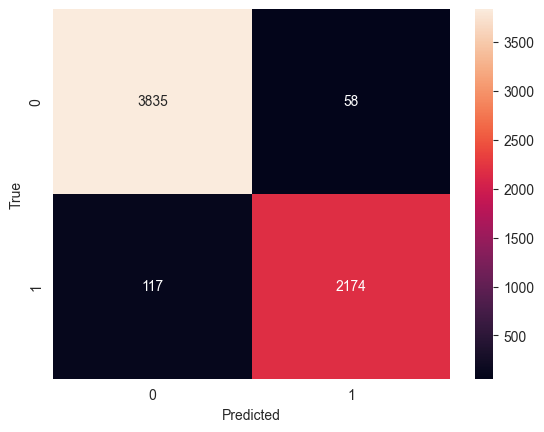

In [6]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = clf.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

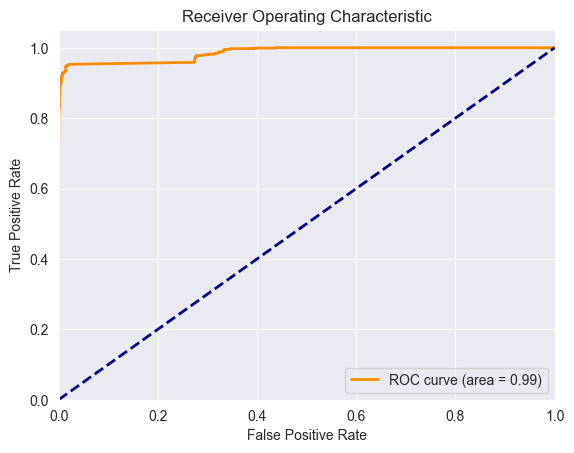

In [7]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [8]:
from sklearn.metrics import accuracy_score,precision_score
accuracy_score(y_test,y_pred)

0.9717011642949547

In [9]:
precision_score(y_test,y_pred)

0.9740143369175627

In [10]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(x_train,y_train)

BernoulliNB()

In [11]:
y_pred = clf.predict(x_test)

In [12]:
accuracy_score(y_test,y_pred)

0.9466364812419146

In [13]:
precision_score(y_test,y_pred)

0.9989821882951654

In [14]:
from sklearn.naive_bayes import ComplementNB
clf = ComplementNB()
clf.fit(x_train,y_train)

ComplementNB()

In [15]:
y_pred = clf.predict(x_test)

In [16]:
accuracy_score(y_test,y_pred)

0.9699223803363519

In [17]:
precision_score(y_test,y_pred)

0.9655019902697921